<div align= "center">
<h1>Tema de estudio: Problemas del corazón.</h1>
</div>

<br>

<div style="text-align: justify">
    
En este proyecto se realiza un estudio acerca de pacientes con problemas al corazón de un hosipital en Cleveland. Con esta información, se plantean técnicas de <code><i><strong>ciencia de datos</strong></i></code> para relacionar información, agrupar, realizar gráficas y obtener conclusiones. 
    
</div>


<br>

El <code><i><strong>dataset</strong></i></code> seleccionado incluye la información de pacientes del hospital:<br>
* Cleveland, Ohio, EE. UU. [Ver localización](https://goo.gl/maps/dqaWAmHdR7hY6ABy8).

<br>

Además, tiene la siguiente composición:



<table align= left>
    <tr>
        <td>
            <h3>Base de datos</h3>
        </td>
        <td>
            <h3>Instancias (Pacientes)</h3>
        </td>
    </tr>
    <tr>
        <td style="text-align:left">
            <h4>Cleveland</h4>
        </td>
        <td style="text-align:center">
            <h4>303</h4>
        </td>
    </tr>
</table>

<br><br><br><br><br><br><br><br><br><br>
    
<hr>

El dataset en cuestión tiene 14 atributos por cada paciente, son los siguientes:<br>

<code><i>Las palabras que tengan el símbolo </i></code><code>Δ#</code><code><i> (delta y un número) pueden ser encontradas en el glosario para entender su significado.</i></code>

1. **Edad**.
2. **Sexo**.
3. **Tipo de dolor en el pecho** .
    - Valor 1: Angina de pecho típica. <code><strong>Δ1</strong></code>
    - Valor 2: Angina de pecho atípica.
    - Valor 3: Dolor no anginal.
    - Valor 4: Asintomático.
    
    
4. **Presión arterial en reposo (mm Hg)**.
5. **Nivel de colesterol sérico (mg/dl)**.
6. **Indicador si el paciente en ayunas tiene un nivel de glucosa mayor a 120 mg/dl (considerado prediabetes)**.
    - Valor 0: Falso.
    - Valor 1: Verdadero.
    
    
7. **Resultados de un test electrocardiográfico en reposo**. <code><strong>Δ2</strong></code>
    - Valor 0: Normal.
    - Valor 1: Tiene una anomalía en la onda ST-T (inversiones de la onda T y/o elevación o depresión de ST > 0,05 mV).
    - Valor 2: Muestra hipertrofia ventricular izquierda probable o definitiva según el criterio de Romhilt-Estes.
    
    
8. **Máximo ritmo cardiáco alcanzado**.
9. **Angina inducida por ejercicio**.
    - Valor 0: No.
    - Valor 1: Sí.
    
    
10. **Depresión del ST inducida por el ejercicio en relación con el reposo**.
11. **Tipo de pendiente del pico del segmento ST**.
    - Valor 1: Subiendo.
    - Valor 2: Plano.
    - Valor 3: Bajando.
    
    
12. **Número de vasos principales (0-3) indicados por la floración**.
13. **Talasemia.** <code><strong>Δ3</strong></code>
    - Valor 3: Normal.
    - Valor 6: Defecto fijo.
    - Valor 7: Defecto reversible.
    
    
14. **Diagnóstico de enfermedad cardíaca (angiografía)**. <code><strong>Δ4</strong></code>
    - Valor 0: < 50% Estrechamiento de vasos sanguíneos principales.
    - Valor 1: > 50% Estrechamiento de vasos sanguíneos principales.


<hr>

### GLOSARIO

Δ1. **Dolor de pecho anginal:** tipo de dolor de pecho causado por la reducción del flujo de sangre al corazón. La angina de pecho es un síntoma de enfermedad de las arterias coronarias.


Δ2. **Test electrocardiográfico:** Un electrocardiograma (ECG o EKG) registra la señal eléctrica del corazón para buscar diferentes afecciones cardíacas.


Δ3. **Talasemia:** Enfermedad sanguínea caracterizada por cantidades inferiores a las normales de una proteína transportadora de oxígeno.


Δ4. **Angiografía:** estudio anatómico de los vasos sanguíneos y su recorrido en cualquier zona del cuerpo.

<hr>


<h1>
Desarrollo
<h1/>
    <p style="font-size:15px">En esta parte es donde se llevara acabo toda la codificacion para el analizis y agrupacion de los datos con la intencion de encontrar una relacion entre los distintos sintomas de los pacientes.</p>
    <h2>codigo<h2/>
  
   
        

Importamos las librerias necesarias y el metodo de Kmeans con sklearn junto con el .csv de nuestro dataset.

Al leer el .csv nos aparece una tabla con todos nuestros datos a analizar.

In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset.csv")
df

,Edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


A continuacion se representaran algunos de los datos principales de la tabla mediante graficas.

<AxesSubplot:title={'center':'Edad'}>

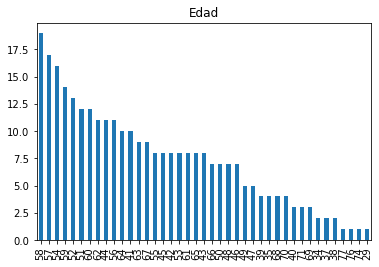

In [20]:
df['Edad'].value_counts().plot(kind='bar', title='Edad')



1 = Hombre
0 = Mujer

<AxesSubplot:title={'center':'Sexo'}>

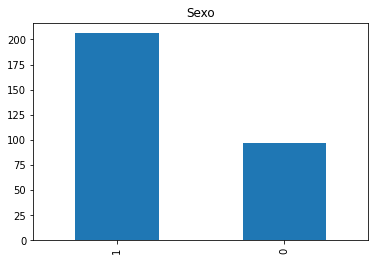

In [21]:
df['sexo '].value_counts().plot(kind='bar', title='Sexo')

<AxesSubplot:title={'center':'Tipo de dolor en el pecho'}>

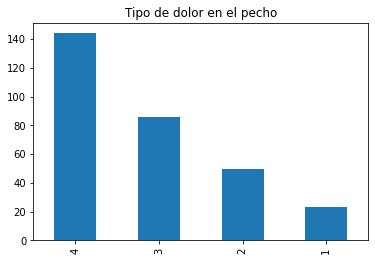

In [22]:
df['cp'].value_counts().plot(kind='bar', title='Tipo de dolor en el pecho')

<AxesSubplot:title={'center':'nivel de glucosa mayor a 120 mg/dl en ayunas'}>

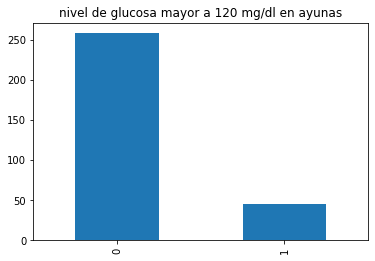

In [25]:
df['fbs'].value_counts().plot(kind='bar', title='nivel de glucosa mayor a 120 mg/dl en ayunas')

<AxesSubplot:title={'center':'test electrocardiográfico en reposo.'}>

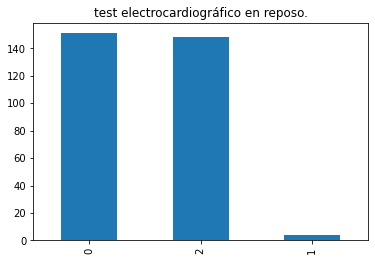

In [26]:
df['restecg'].value_counts().plot(kind='bar', title='test electrocardiográfico en reposo.')

<AxesSubplot:title={'center':'Angina inducida por ejercicio.'}>

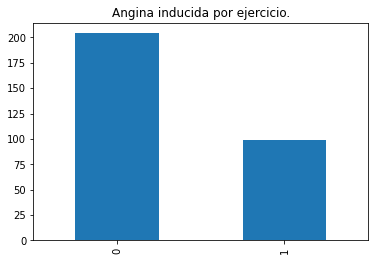

In [27]:
df['exang'].value_counts().plot(kind='bar', title='Angina inducida por ejercicio.')

<AxesSubplot:title={'center':'Tipo de pendiente del pico del segmento ST'}>

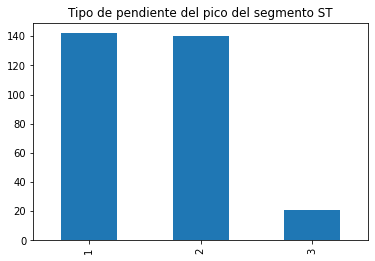

In [28]:
df['slope'].value_counts().plot(kind='bar', title='Tipo de pendiente del pico del segmento ST')

<AxesSubplot:title={'center':'Talasemia'}>

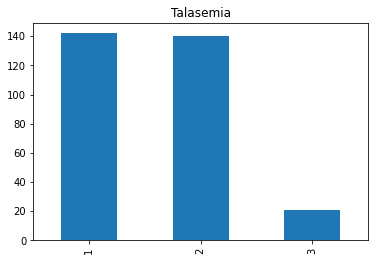

In [29]:
df['slope'].value_counts().plot(kind='bar', title='Talasemia')

<AxesSubplot:title={'center':'angiografía'}>

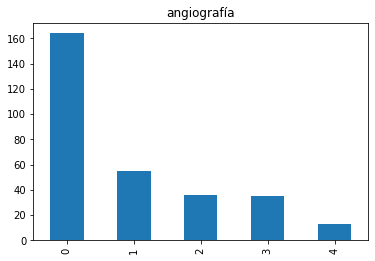

In [30]:
df['num'].value_counts().plot(kind='bar', title='angiografía')

Una vez leido los datos de la tabla procedemos a crear el codigo para agrupar los datos creando tres centroides asignandoles
valores aleatorios.

Cuando se hayan agrupado se mostrara en un array a que grupo pertenece cada conjunto de datos.

In [30]:
centroides=np.array([[54,1,2,115,249,0,2,135,0,1.6,3,0,6,1],[43,0,4,136,198,1,2,155,1,2.4,1,2,3,1],[60,0,3,130,266,0,0,178,0,1,2,0,6,3]], np.int32)
kmeans = KMeans(n_clusters=3, init=centroides,n_init=1)
##clustering = KMeans(n_clusters=3,  random_state = 14, init=3)
clusters=kmeans.fit_predict(df)
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,

Se utiliza el siguiente codigo para mostrar la tabla de datos con el respectivo grupo al que pertenece.

In [31]:
df["Grupo"] = clusters
df

,Edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Grupo
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,0
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,0


<b>Grafica representativa de los grupos a los que pertenece cada paciente.</b>

<AxesSubplot:title={'center':'Pacientes'}, ylabel='Grupo'>

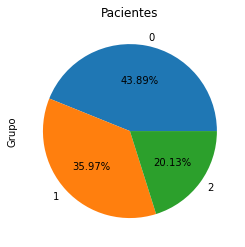

In [32]:
df['Grupo'].value_counts().plot(kind='pie', autopct='%.2f%%', title='Pacientes')

<h1>Conclusiones</h1>
<p>Con la realizacion de esta Producto Integrador, el equipo ha llevado a cabo el manejo de esta informacion para elaborar 
   un trabajo de ciencia de datos.</p>
<p>Como se menciono el tema manejado fue el estudio de informacion sobre pacientes con problemas medicos de corazon. De los datos disponibles del hospital de Cleveland unicamente se decidio utilizar 14 de los datos proporcionados por el Dataset, con el proposito de encontrar la relacion entre los sintomas con mas presencia en estos pacientes.</p>
<p>Haciendo uso del metodo k-medias para la obtencion de agrupamientos en los datos que manejamos, de esta forma obtener una conclusion de cuales son los sintomas mas incurrentes respecto a otros.</p>
<p>Una vez realizado los calculos en el algoritmo los resultados arrogados fueron los siguientes:</p>


In [18]:
re = pd.read_csv("Resultados.csv")
re

,Unnamed: 0,Edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,43.89%,54,1,2,115,249,0,2,135,0,1.6,3,0,6,1
1,35.97%,43,0,4,136,198,1,2,155,1,2.4,1,2,3,1
2,20.13%,60,0,3,130,266,0,0,178,0,1.0,2,0,6,3


<p>Un vez presentados los resultados el equipo ha concluido que:</p>

Gracias a esto podriamos decir que por ejemplo el porcentaje mayor de pacientes hombres en el hospital de Cleveland tiene al rededor de 54 años y el dolor de pecho mas comun que presentan es Angina de pecho atípica.

Para terminar de concluir podriamos decir que gracias a este estudio de datos podemos saber que tipo de sintomas son los mas tratados en el hospital e incluso ver las relaciones entre estos. por ejemplo podemos ver en la tabla que los hombres tienden a tener una presion arterial en reposo mas bajo que las mujeres. Aunque a este proyecto le falte pulirse mas creemos que cumple con su cometido y refleja la utilidad del metodo de K-medias.